<h1 style="font-size: 2.5rem; color: #2D7FB8">Import Libraries</h1>



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from numpy import asarray
import matplotlib.image as mpimg
from sklearn.decomposition import PCA

/home/tako/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/home/tako/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', 

<h1 style="font-size: 2.5rem; color: #3086C1">Load Dataset</h1>

In [ ]:
x = np.loadtxt('/data/nem/faces.dat')
print("Data Shape:",x.shape)
print("Datatype of data:",x.dtype)
print(x)

Data Shape: (400, 4096)
Datatype of data: float64
[[ 75.  83.  83. ...  42.  40.  38.]
 [110. 108. 120. ...  35.  33.  37.]
 [ 77.  75.  65. ...  37.  38.  37.]
 ...
 [121. 119. 113. ...  41.  45.  46.]
 [ 52.  49.  51. ... 143. 144. 146.]
 [125. 125. 125. ...  96.  91.  93.]]


<h2 style="font-size: 2.5rem; color: #2D7FB8">Display 200th Image</h2>

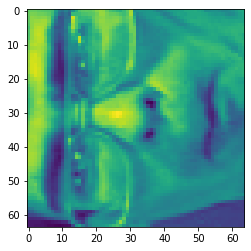

In [ ]:
sample_image = x[199,:].reshape(64,64)
plt.imshow(sample_image)

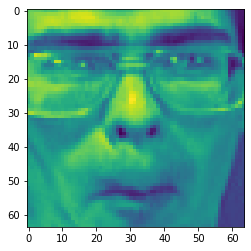

In [ ]:
sample_image = x[199,:].reshape(64,64).T
plt.imshow(sample_image)

<h4 style="font-size: 2.5rem; color: #2D7FB8">Mean Removal</h4>

In [ ]:
mean = x.mean(axis=1)
data = x - mean[:, np.newaxis]


<h4 style="font-size: 2.5rem; color: #2D7FB8">Display 200th Image after Mean Removal</h4>

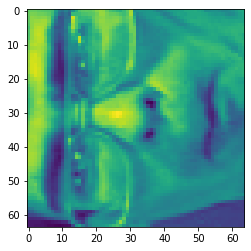

In [ ]:
sample_image = data[199,:].reshape(64,64)
plt.imshow(sample_image)

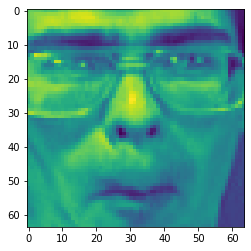

In [ ]:
sample_image = data[199,:].reshape(64,64).T
plt.imshow(sample_image)

<h4 style="font-size: 2.5rem; color: #2D7FB8">Mean removal other way</h4>

In [ ]:
X_mean = x.mean(axis=0)
mx = x - X_mean

<h4 style="font-size: 2.5rem; color: #2D7FB8">Display 200th Image after mean removal other way</h4>

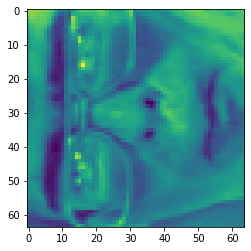

In [ ]:
sample_image = mx[199,:].reshape(64,64)
plt.imshow(sample_image)

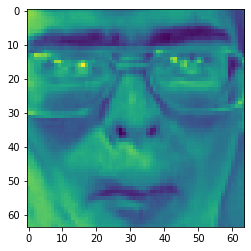

In [ ]:
sample_image = mx[199,:].reshape(64,64).T
plt.imshow(sample_image)

<h4 style="font-size: 2.5rem; color: #2D7FB8">PCA on the mean-centered data & descending order plot </h4>

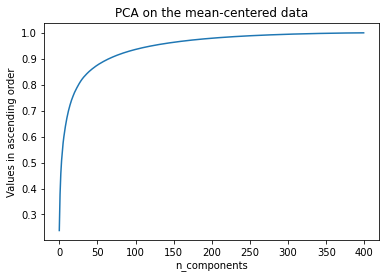

In [ ]:
from sklearn.decomposition import PCA

rx = PCA(n_components = 400)
rx=rx.fit(mx)
variance = np.cumsum(rx.explained_variance_ratio_)
plt.ylabel('Values in ascending order')
plt.xlabel('n_components')
plt.title('PCA on the mean-centered data')
plt.plot(variance)



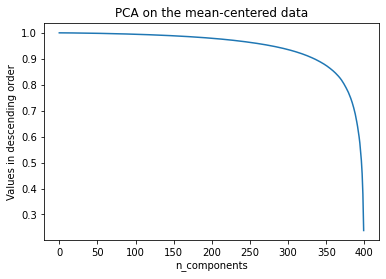

In [ ]:
sorted_array = np.sort(variance)[::-1]
plt.ylabel('Values in descending order')
plt.xlabel('n_components')
plt.title('PCA on the mean-centered data')
plt.plot(sorted_array)

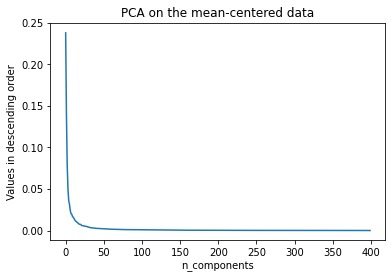

In [ ]:
# Without cumsum

variance = rx.explained_variance_ratio_
plt.ylabel('Values in descending order')
plt.xlabel('n_components')
plt.title('PCA on the mean-centered data')
plt.plot(variance)

<h4 style="font-size: 2.5rem; color: #2D7FB8">We do get an eigenvalue equal to 0 because we have performed the PCA on a mean centered data matrix, hence we will get one eigenvalue as 0. Assume data matrix X with shape N-by-D, where N is the sample number (400 here) and D is the feature (4096 here). The rank of X is 400 and then 399 after mean substraction (denote X1). Then the rank of covariance matrix is rank(COV(X1))=rank(X1)=399. So the convariance matrix has at most 399 non-zero eigenvalues, yielding last eignvalue is zero. </h4>

<h4 style="font-size: 2.5rem; color: #2D7FB8">1. To decide the dimensions, first option is to view the above first plot that shows variance & components, The dimensions can be decided by looking at the curve where it starts to flatten. <br>
2. Another better way is shown in below code that considers the required variance and pca components required for that. For example to have 90% variance, it would require 66 components but for 95% variance it requires 123 components. The output of below code shows the number 66 for 90% variance and 123 for 95% variance. </h4>

In [ ]:
# Below code shows the required variance and pca components required for that. For example to have 90% variance, it would require
#66 components but for 95% variance it requires 123 components.
pca=PCA(0.90)
X_new=pca.fit_transform(mx)
print (X_new.shape) 

pca=PCA(0.95)
X_new=pca.fit_transform(mx)
print (X_new.shape) 


(400, 66)
(400, 123)


<h4 style="font-size: 2.5rem; color: #2D7FB8">Top-5 leading eigenvectors</h4>

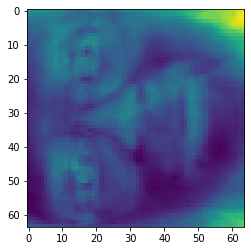

[-0.0041911  -0.00454849 -0.00504107 ...  0.00097803  0.0024609
  0.00318826]


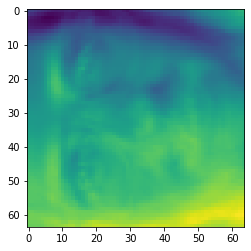

[-0.02859139 -0.02970844 -0.03133229 ...  0.02413049  0.0246791
  0.02488899]


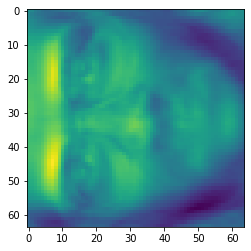

[ 0.00135691 -0.00137597 -0.0050605  ... -0.01308033 -0.0132958
 -0.01188341]


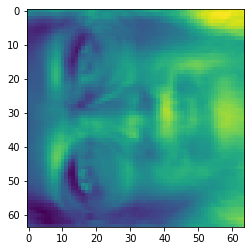

[ 1.12445402e-03  1.59580244e-04 -3.31539329e-05 ...  2.12589808e-02
  2.34428185e-02  2.52185519e-02]


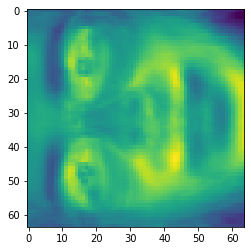

[-0.02384273 -0.02406979 -0.02494083 ... -0.04053413 -0.04045461
 -0.04110328]


In [ ]:
#Using Sklearn Attribute: components_ [components_ndarray of shape (n_components, n_features)]
#Principal axes in feature space, representing the directions of maximum variance in the data.
#Equivalently, the right singular vectors of the centered input data, parallel to its eigenvectors.
#The components are sorted by explained_variance_.
#Since sklearn components_ attribute already sorted the values from top to bottom therefore below code prints top-5 vectors

for i in range(5):
  vector =rx.components_[i,:]
  Pc = vector.reshape((64,64))
  imgplot = plt.imshow(Pc)
  plt.show()
  print(vector)
# Printed raw vector and image

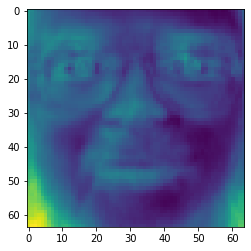

[-0.0041911  -0.00454849 -0.00504107 ...  0.00097803  0.0024609
  0.00318826]


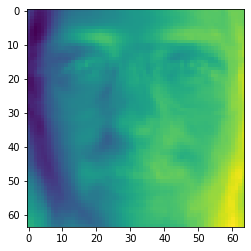

[-0.02859139 -0.02970844 -0.03133229 ...  0.02413049  0.0246791
  0.02488899]


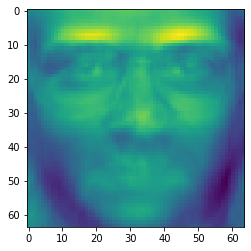

[ 0.00135691 -0.00137597 -0.0050605  ... -0.01308033 -0.0132958
 -0.01188341]


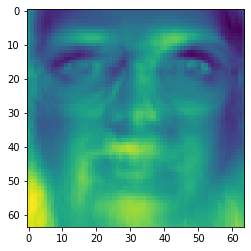

[ 1.12445402e-03  1.59580244e-04 -3.31539329e-05 ...  2.12589808e-02
  2.34428185e-02  2.52185519e-02]


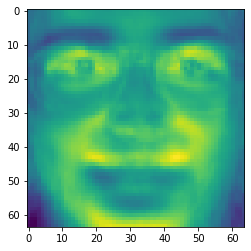

[-0.02384273 -0.02406979 -0.02494083 ... -0.04053413 -0.04045461
 -0.04110328]


In [ ]:
#Using Sklearn Attribute: components_ [components_ndarray of shape (n_components, n_features)]
#Principal axes in feature space, representing the directions of maximum variance in the data.
#Equivalently, the right singular vectors of the centered input data, parallel to its eigenvectors.
#The components are sorted by explained_variance_.
#Since sklearn components_ attribute already sorted the values from top to bottom therefore below code prints top-5 vectors

for i in range(5):
  vector =rx.components_[i,:]
  Pc = vector.reshape((64,64)).T
  imgplot = plt.imshow(Pc)
  plt.show()
  print(vector)
# Printed raw vector and image

<h4 style="font-size: 2.5rem; color: #2D7FB8">Reconstructed 100th image using 10, 100, 200, and 399 PC</h4>

In [ ]:
print('Total Principal Components:', rx.components_.shape)

Total Principal Components: (400, 4096)


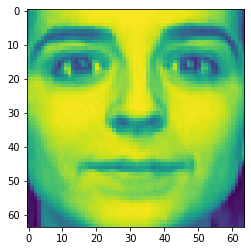

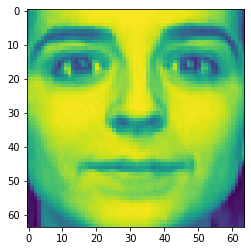

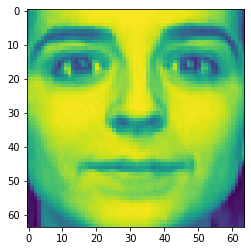

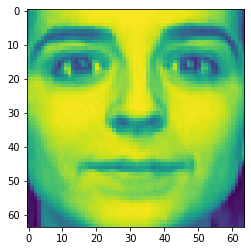

In [ ]:
# principal components and 100th image with .reshape (1,4096)

P_components = [9,99,199,398]
for id in P_components:
  components = rx.components_[id,:].reshape((1,4096))
  image = data[99].reshape((1,4096))
  reconstruct = np.dot(components,np.dot(components.T, image)).T
  image = reconstruct.reshape((64,64)).T
  imgplot = plt.imshow(image)
  plt.show()

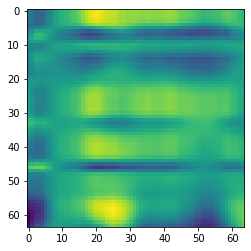

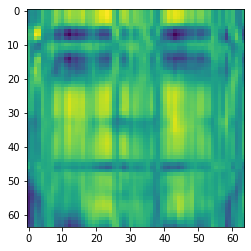

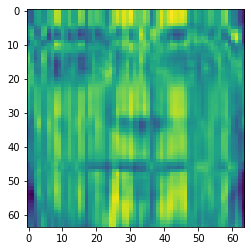

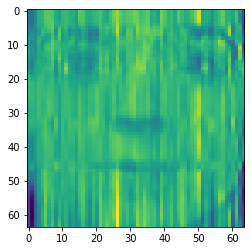

In [ ]:
# principal components and 100th image with .reshape (64,64)

P_components = [9,99,199,398]
for id in P_components:
  components = rx.components_[id,:].reshape((64,64))
  image = data[99].reshape((64,64))
  reconstruct = np.dot(components,np.dot(components.T, image)).T
  imgplot = plt.imshow(reconstruct)
  plt.show()

<h4 style="font-size: 2.5rem; color: #2D7FB8">Reconstructed 100th image using 10, 100, 200, and 399 PC Other Way</h4>

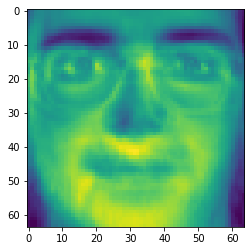

In [ ]:
P_components = PCA(n_components = 10)
F10 = P_components.fit_transform(mx)
Reconstruct = P_components.inverse_transform(F10)
Reconstructed = Reconstruct[99,:].reshape((64,64)).T
plt.imshow(Reconstructed)
plt.show()

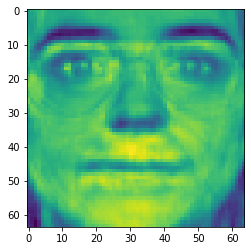

In [ ]:
P_components = PCA(n_components = 100)
F100 = P_components.fit_transform(mx)
Reconstruct = P_components.inverse_transform(F100)
Reconstructed = Reconstruct[99,:].reshape((64,64)).T
plt.imshow(Reconstructed)
plt.show()

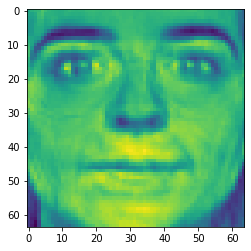

In [ ]:
P_components = PCA(n_components = 200)
F200 = P_components.fit_transform(mx)
Reconstruct = P_components.inverse_transform(F200)
Reconstructed = Reconstruct[99,:].reshape((64,64)).T
plt.imshow(Reconstructed)
plt.show()

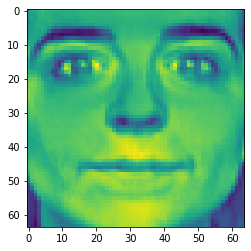

In [ ]:
P_components = PCA(n_components = 399)
F399 = P_components.fit_transform(mx)
Reconstruct = P_components.inverse_transform(F399)
Reconstructed = Reconstruct[99,:].reshape((64,64)).T
plt.imshow(Reconstructed)
plt.show()